#  House Price Prediction
    
## Problem statement


To build a regression model for a US-based housing company named Suprise Housing that has decided to enter the Australian market and intends to use data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The data set based on the sale of houses in Australia has been provided and the objective is to design a model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


## Business Goal

(1) Understanding which variables are significant in predicting the price of a house, and<br>
(2) How well those variables describe the price of a house

### Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#to set max diaplay of rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset and loading the data into housing dataframe
housing = pd.read_csv("train.csv")
housing.shape

(1460, 81)

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

summary of the dataset: 1460 rows, 81 columns

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Cleaning

In [6]:
#checking for duplicate rows
housing[housing.duplicated(['Id'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Observation: There are no duplicate rows in housing dataset

In [7]:
# sum it up to check how many rows, columns have all missing values
print('Number of empty Rows:', housing.isnull().all(axis=1).sum())
print('Number of empty Columns:', housing.isnull().all(axis=0).sum())

Number of empty Rows: 0
Number of empty Columns: 0


In [8]:
# check for percentage of missing values
((housing.isnull().sum()/len(housing.index))*100)[(housing.isnull().sum()/len(housing.index))*100>0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [9]:
#Imputing the categorical variables with 'None'. As given in the dictionary,the null values in the given columns indicate the absence of facility but does not mean missing
cat_meaningful_columns_with_null = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
                                    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "MiscFeature", "Fence", "PoolQC", "Electrical"]
for i in cat_meaningful_columns_with_null:
    housing[i] = np.where(housing[i].isnull(),"None",housing[i])
    
housing.shape

(1460, 81)

In [10]:
housing[['LotFrontage', 'MasVnrArea']].describe() 

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


In [11]:
#Imputing missing values with median for MasVnrArea and LotFrontage columns
def impute_con(missing_col):
    for i in missing_col:
        housing.loc[housing.loc[:,i].isnull(),i]=housing.loc[:,i].median()
        
impute_con(['MasVnrArea', 'LotFrontage'])

In [12]:
# fill GarageYrBlt with 0 value and Check if garage is present or not for house
housing['GarageYrBlt']=housing['GarageYrBlt'].fillna(0).astype(int)

def getGarage(garage):
    if garage == 0:
        return 0
    else:   
        return 1
    
housing['garageBlt'] = housing['GarageYrBlt'].apply(getGarage)

In [13]:
# Again check for percentage of missing values
(round(housing.isnull().sum()/len(housing.index), 2)*100)[round(housing.isnull().sum()/len(housing.index), 2)*100>0]

Series([], dtype: float64)

Now, after data cleaning there are no missing values

In [14]:
#Dropping Id, as we dont use this in further analysis
housing=housing.drop('Id',axis=1)
housing.shape

(1460, 81)

In [15]:
#Deriving new column HouseAge from YrSold, YearBuilt as we cannot use them directlyin anlysis
housing['HouseAge']=housing['YrSold'] - housing['YearBuilt']
housing.shape

(1460, 82)

In [16]:
# Drop YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, as we have created new features from them
housing.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

#Dropping column MoSold as we are not using it in further analysis
housing.drop(['MoSold'], axis = 1, inplace = True)
housing.shape

(1460, 77)


#### Outlier Treatment

In [17]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garageBlt,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,0.944521,36.547945
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,0.228992,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,1.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,1.000000,35.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,1.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,1.000000,136.000000


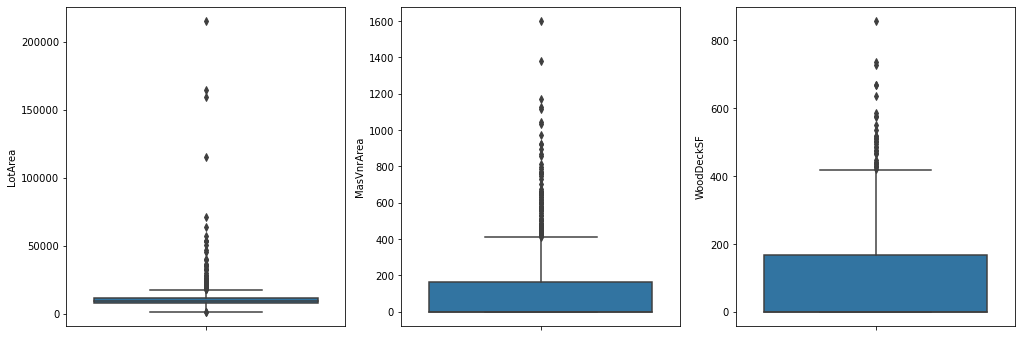

In [18]:
# Check the outliers in all the numeric columns
plt.figure(figsize=(17, 20))
plt.subplot(3,3,1)
sns.boxplot(y = 'LotArea', data = housing)
plt.subplot(3,3,2)
sns.boxplot(y = 'MasVnrArea', data = housing)
plt.subplot(3,3,3)
sns.boxplot(y = 'WoodDeckSF', data = housing)
plt.show()

In [19]:
# Removing Outliers, removing values beyond 98% for LotArea, 99% for MasVnrArea, 99% for WoodDeckSF
housing = housing[housing["LotArea"] < housing['LotArea'].quantile(0.98)]
housing = housing[housing["MasVnrArea"] < housing['MasVnrArea'].quantile(0.99)]
housing = housing[housing["WoodDeckSF"] < housing['WoodDeckSF'].quantile(0.99)]

In [20]:
# Determine the percentage of data retained
print(round(100*(len(housing)/1460),2))

95.89


## Step 3: Data Visualization

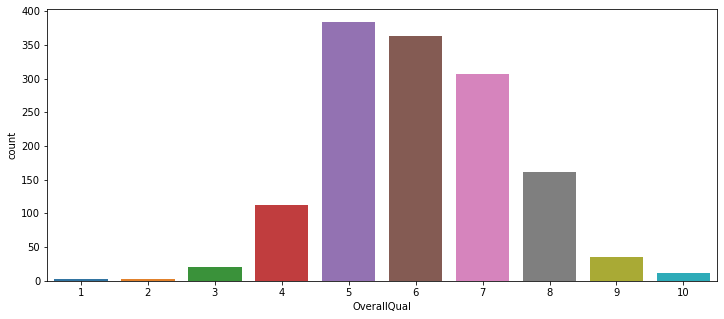

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(housing.OverallQual)
plt.show()

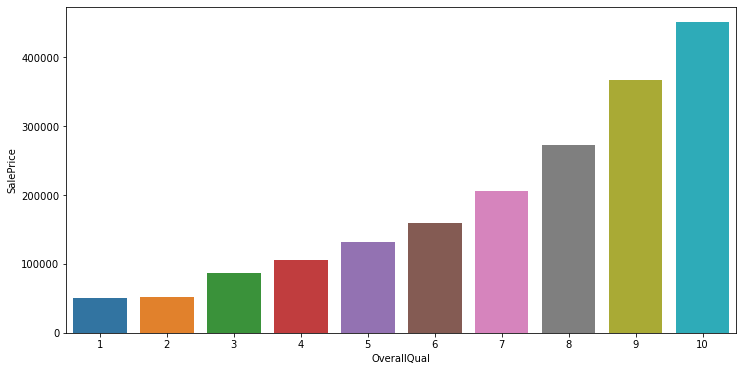

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='OverallQual',y='SalePrice',data=housing,ci=False)
plt.show()

Observation: SalePrice is getting increasing as OverallQual increasing

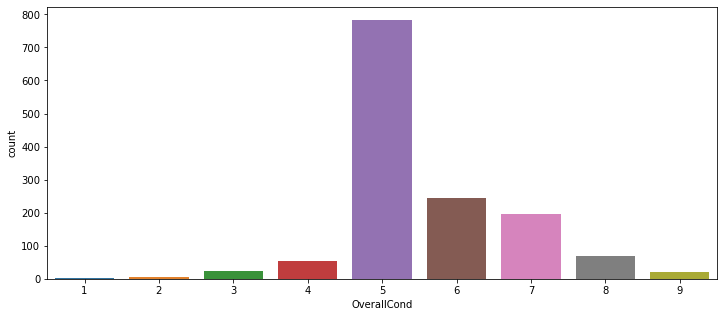

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(housing.OverallCond)
plt.show()

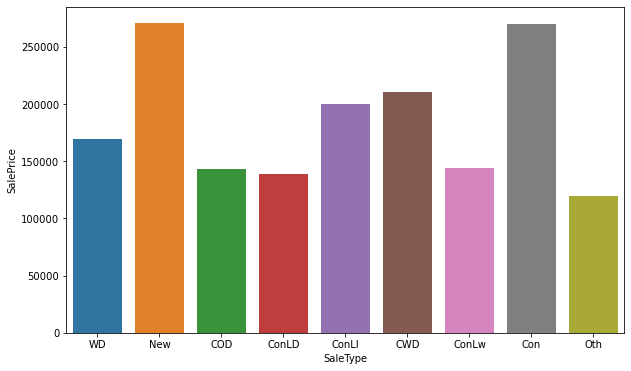

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='SaleType',y='SalePrice',data=housing,ci=False)
plt.show()

Observation: SalePrice is high for New(Home just constructed and sold) and Con(Contract 15% Down payment regular terms)

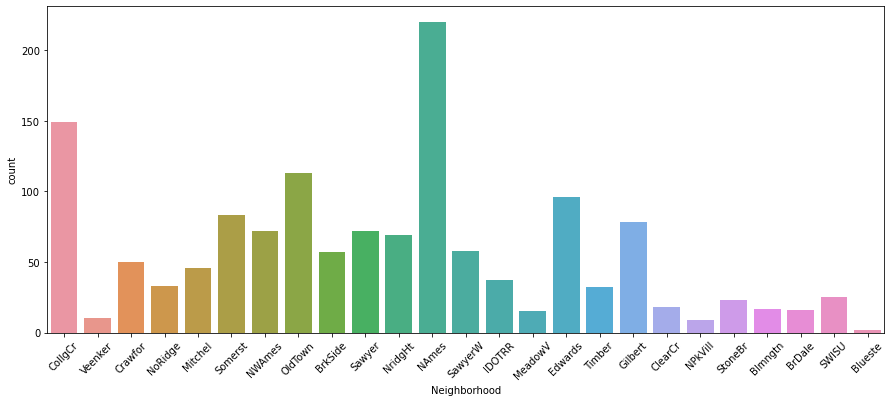

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(housing.Neighborhood)
plt.xticks(rotation=45)
plt.show()

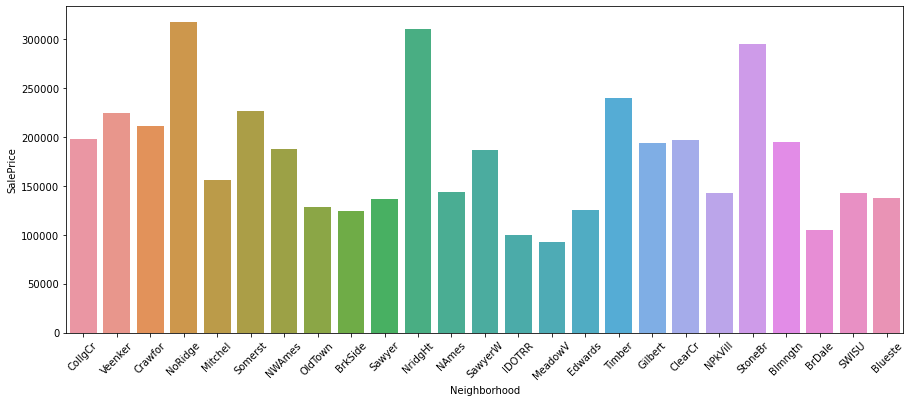

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(x='Neighborhood',y='SalePrice',data=housing,ci=False)
plt.xticks(rotation=45)
plt.show()

Observation: SalePrice is high in NoRidge(Northridge), NridHt(Northridge Heights), StoneBr(Stone Brook)

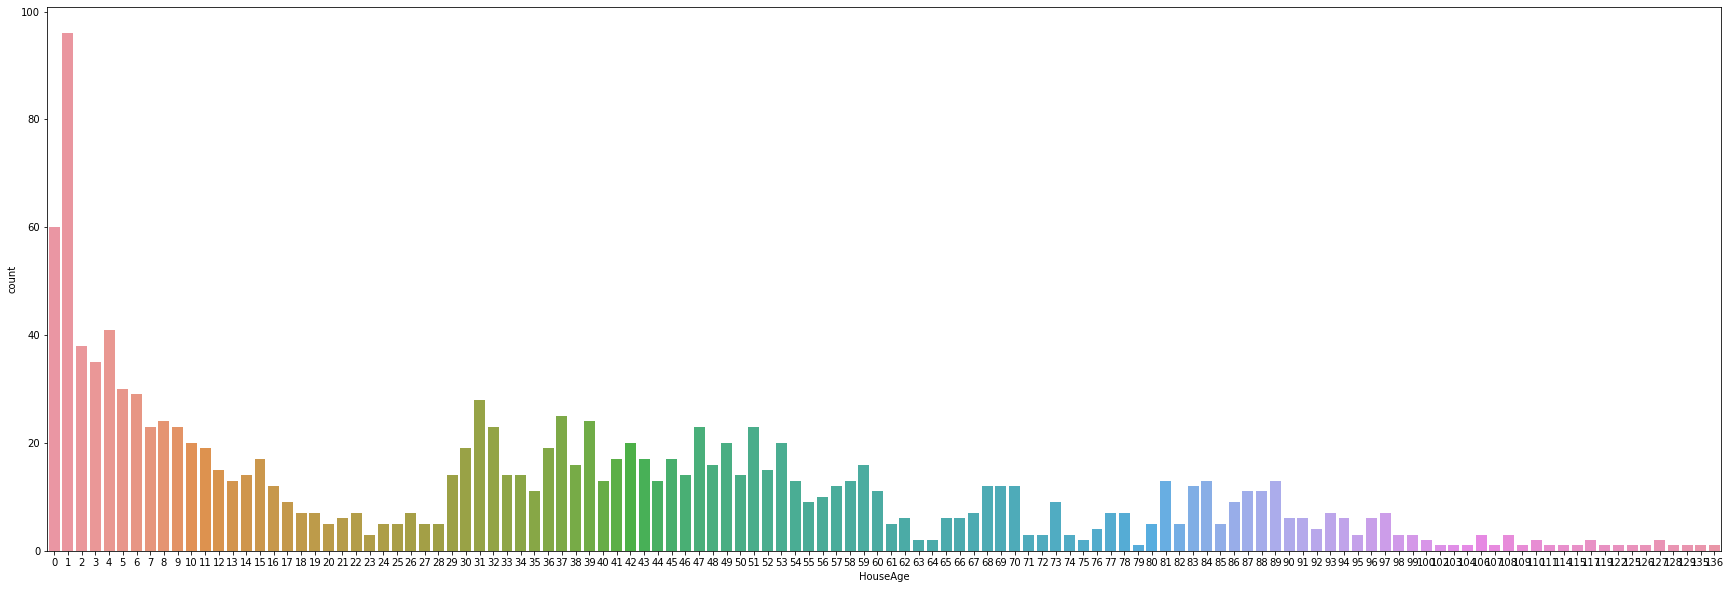

In [27]:
plt.figure(figsize=(30,10))
sns.countplot(housing.HouseAge)
plt.show()

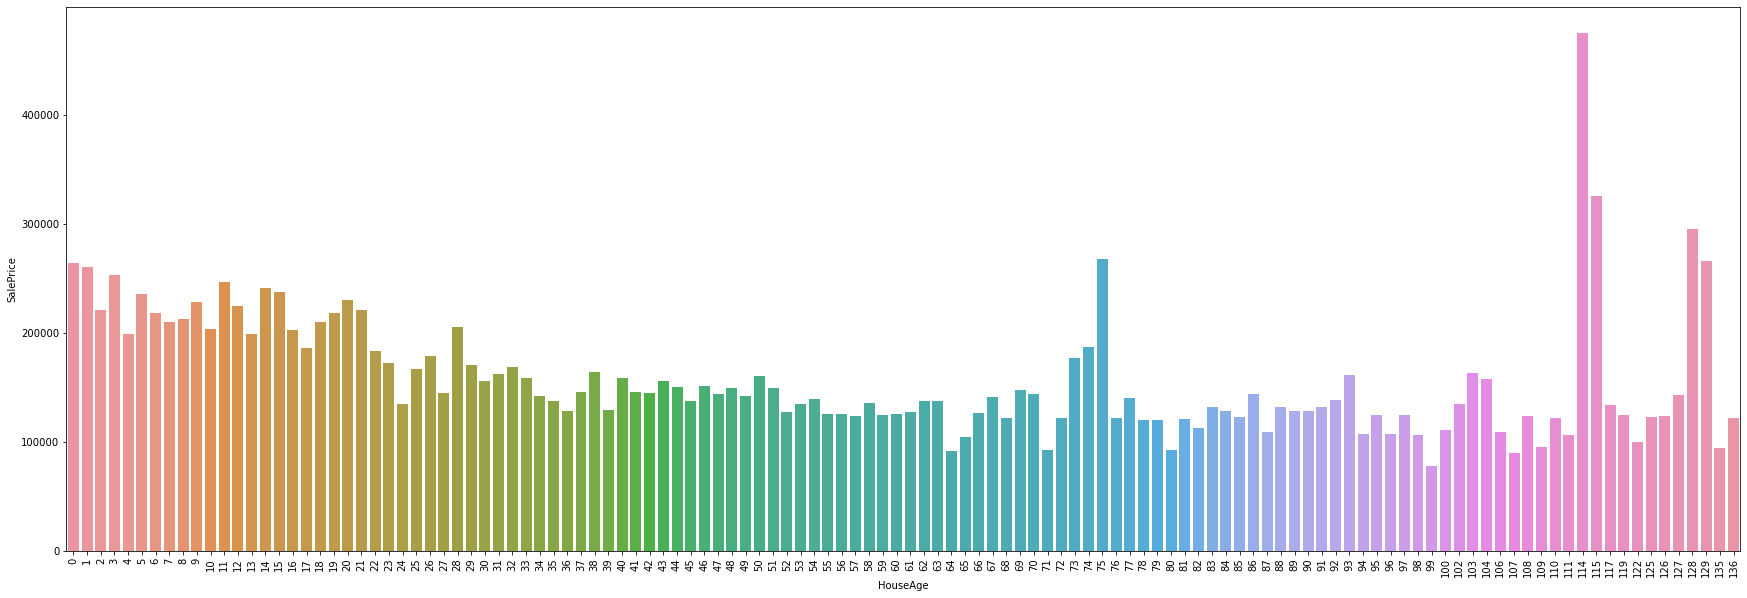

In [28]:
plt.figure(figsize=(30,10))
sns.barplot(x='HouseAge',y='SalePrice',data=housing,ci=False)
plt.xticks(rotation=90)
plt.show()

Observation: Less the house age high the SalePrice

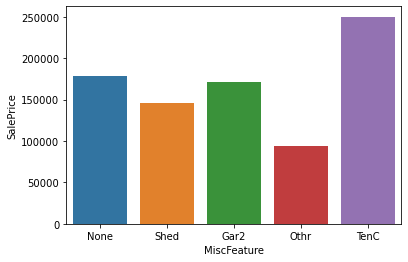

In [29]:
sns.barplot(x='MiscFeature',y='SalePrice',data=housing,ci=False)
plt.show()

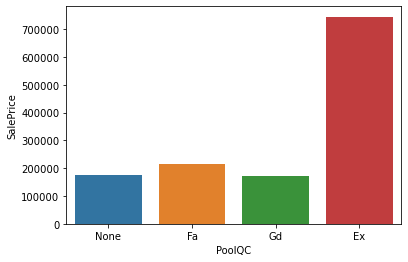

In [30]:
sns.barplot(x='PoolQC',y='SalePrice',data=housing,ci=False)
plt.show()

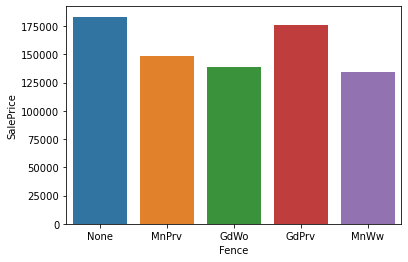

In [31]:
sns.barplot(x='Fence',y='SalePrice',data=housing,ci=False)
plt.show()

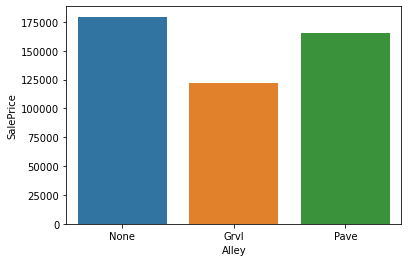

In [32]:
sns.barplot(x='Alley',y='SalePrice',data=housing,ci=False)
plt.show()

In [33]:
#Dropping those columns 'MiscFeature', 'Fence', 'Alley' which are not relevent for deriving the best model parameters
housing=housing.drop(['MiscFeature', 'Fence', 'Alley'],axis=1)
housing.shape

(1400, 74)

<Figure size 1080x576 with 0 Axes>

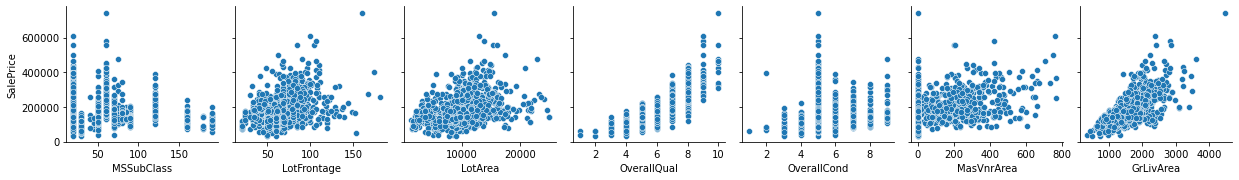

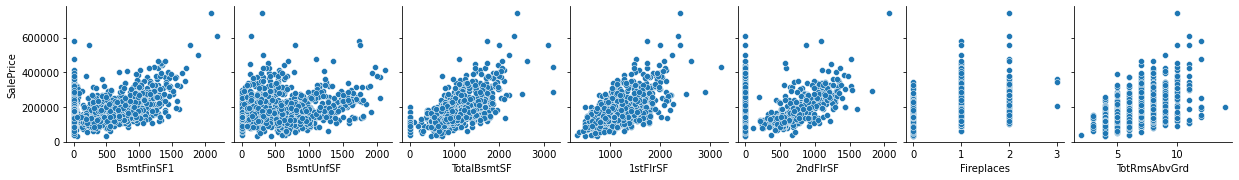

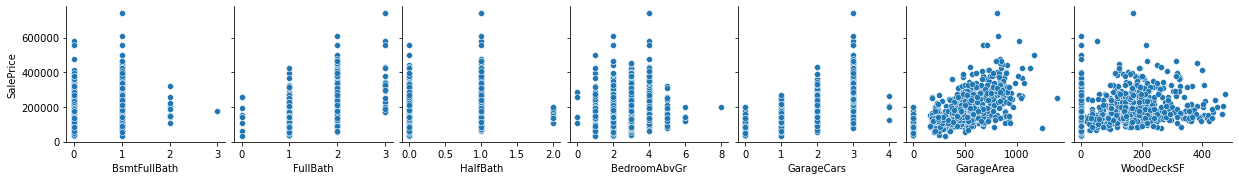

In [34]:
# Check the numerical values using pairplots
plt.figure(figsize=(15,8))
sns.pairplot(housing, x_vars=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea', 'GrLivArea'], y_vars='SalePrice',kind='scatter', diag_kind=None)
sns.pairplot(housing, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF','2ndFlrSF', 'Fireplaces', 'TotRmsAbvGrd'], y_vars='SalePrice',kind='scatter', diag_kind=None)
sns.pairplot(housing, x_vars=['BsmtFullBath','FullBath', 'HalfBath', 'BedroomAbvGr','GarageCars','GarageArea', 'WoodDeckSF' ], y_vars='SalePrice',kind='scatter', diag_kind=None)
plt.show()

Observation: Correlation between GrLivArea and SalePrice is very high

In [35]:
# correlation matrix
cor = housing.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garageBlt,HouseAge
MSSubClass,1.000000,-0.397077,-0.393453,0.042752,-0.055126,0.016078,-0.079065,-0.059579,-0.140126,-0.256000,-0.263608,0.315269,0.046500,0.083983,0.004204,-0.000536,0.136371,0.177550,-0.032385,0.294171,0.041212,-0.040224,-0.048980,-0.111309,-0.035744,0.000336,-0.011335,-0.044667,-0.022454,-0.003887,-0.010739,-0.084877,-0.088149,-0.025422
LotFrontage,-0.397077,1.000000,0.571741,0.210696,-0.057677,0.167565,0.133739,0.040814,0.143168,0.308987,0.355952,0.065523,0.017522,0.324306,0.050609,-0.020537,0.179937,0.059608,0.252799,0.002113,0.310976,0.218454,0.287472,0.313289,0.082809,0.127979,-0.009062,0.075049,0.060378,0.077529,0.002885,0.363584,0.100972,-0.126338
LotArea,-0.393453,0.571741,1.000000,0.194324,-0.010171,0.109683,0.166339,0.080393,0.099113,0.311048,0.404682,0.115712,0.023144,0.405082,0.084884,0.023108,0.191358,0.107812,0.272430,-0.010417,0.373655,0.319364,0.277494,0.316090,0.136305,0.147332,-0.005925,0.089976,0.108922,0.049335,0.060043,0.393172,0.138957,-0.062746
OverallQual,0.042752,0.210696,0.194324,1.000000,-0.088376,0.384476,0.223473,-0.055791,0.296597,0.529753,0.460993,0.271688,-0.037436,0.577441,0.111369,-0.044658,0.546066,0.264578,0.098157,-0.187533,0.409704,0.398102,0.598770,0.556319,0.230080,0.315449,-0.121952,0.034864,0.077886,0.044521,-0.029627,0.799981,0.267341,-0.573051
OverallCond,-0.055126,-0.057677,-0.010171,-0.088376,1.000000,-0.128974,-0.030076,0.040301,-0.142229,-0.168401,-0.143406,0.034847,0.033755,-0.073014,-0.043711,0.123863,-0.198738,-0.053634,0.012625,-0.083306,-0.055591,-0.011048,-0.180340,-0.138659,0.000199,-0.036914,0.084717,0.025059,0.060249,-0.002432,0.068375,-0.076426,0.011688,0.376324
MasVnrArea,0.016078,0.167565,0.109683,0.384476,-0.128974,1.000000,0.244846,-0.060115,0.085434,0.323666,0.313696,0.108604,-0.073529,0.321426,0.103611,0.020832,0.237396,0.182107,0.091304,-0.027327,0.256865,0.238608,0.359676,0.367806,0.122859,0.127262,-0.105186,0.034710,0.071116,-0.007471,-0.030046,0.435230,0.128811,-0.312572
BsmtFinSF1,-0.079065,0.133739,0.166339,0.223473,-0.030076,0.244846,1.000000,-0.054064,-0.525747,0.457244,0.383410,-0.184698,-0.075915,0.116573,0.652445,0.070544,0.043508,-0.013779,-0.129402,-0.087337,-0.005555,0.225059,0.219795,0.259337,0.190117,0.071606,-0.113688,0.033449,0.070627,0.072203,0.005477,0.404994,0.109384,-0.254955
BsmtFinSF2,-0.059579,0.040814,0.080393,-0.055791,0.040301,-0.060115,-0.054064,1.000000,-0.203466,0.113456,0.101662,-0.096863,0.011778,-0.007801,0.151086,0.064431,-0.071538,-0.025962,-0.007832,-0.039994,-0.031640,0.028824,-0.033870,-0.010201,0.073845,0.020175,0.036938,-0.030238,0.079010,0.056360,0.005642,-0.014769,0.039328,0.042119
BsmtUnfSF,-0.140126,0.143168,0.099113,0.296597,-0.142229,0.085434,-0.525747,-0.203466,1.000000,0.446378,0.335137,-0.007546,0.035870,0.246708,-0.415759,-0.099684,0.281179,-0.050833,0.172220,0.030368,0.250452,0.052177,0.211296,0.185987,-0.019350,0.126830,0.002988,0.021938,-0.005102,-0.038930,-0.024123,0.210087,0.032958,-0.142321
TotalBsmtSF,-0.256000,0.308987,0.311048,0.529753,-0.168401,0.323666,0.457244,0.113456,0.446378,1.000000,0.799015,-0.238284,-0.036071,0.383368,0.292595,-0.008447,0.319446,-0.079019,0.046924,-0.073988,0.250794,0.301862,0.442854,0.466102,0.206123,0.218650,-0.100987,0.046687,0.098838,0.055372,-0.017997,0.642068,0.164700,-0.402263


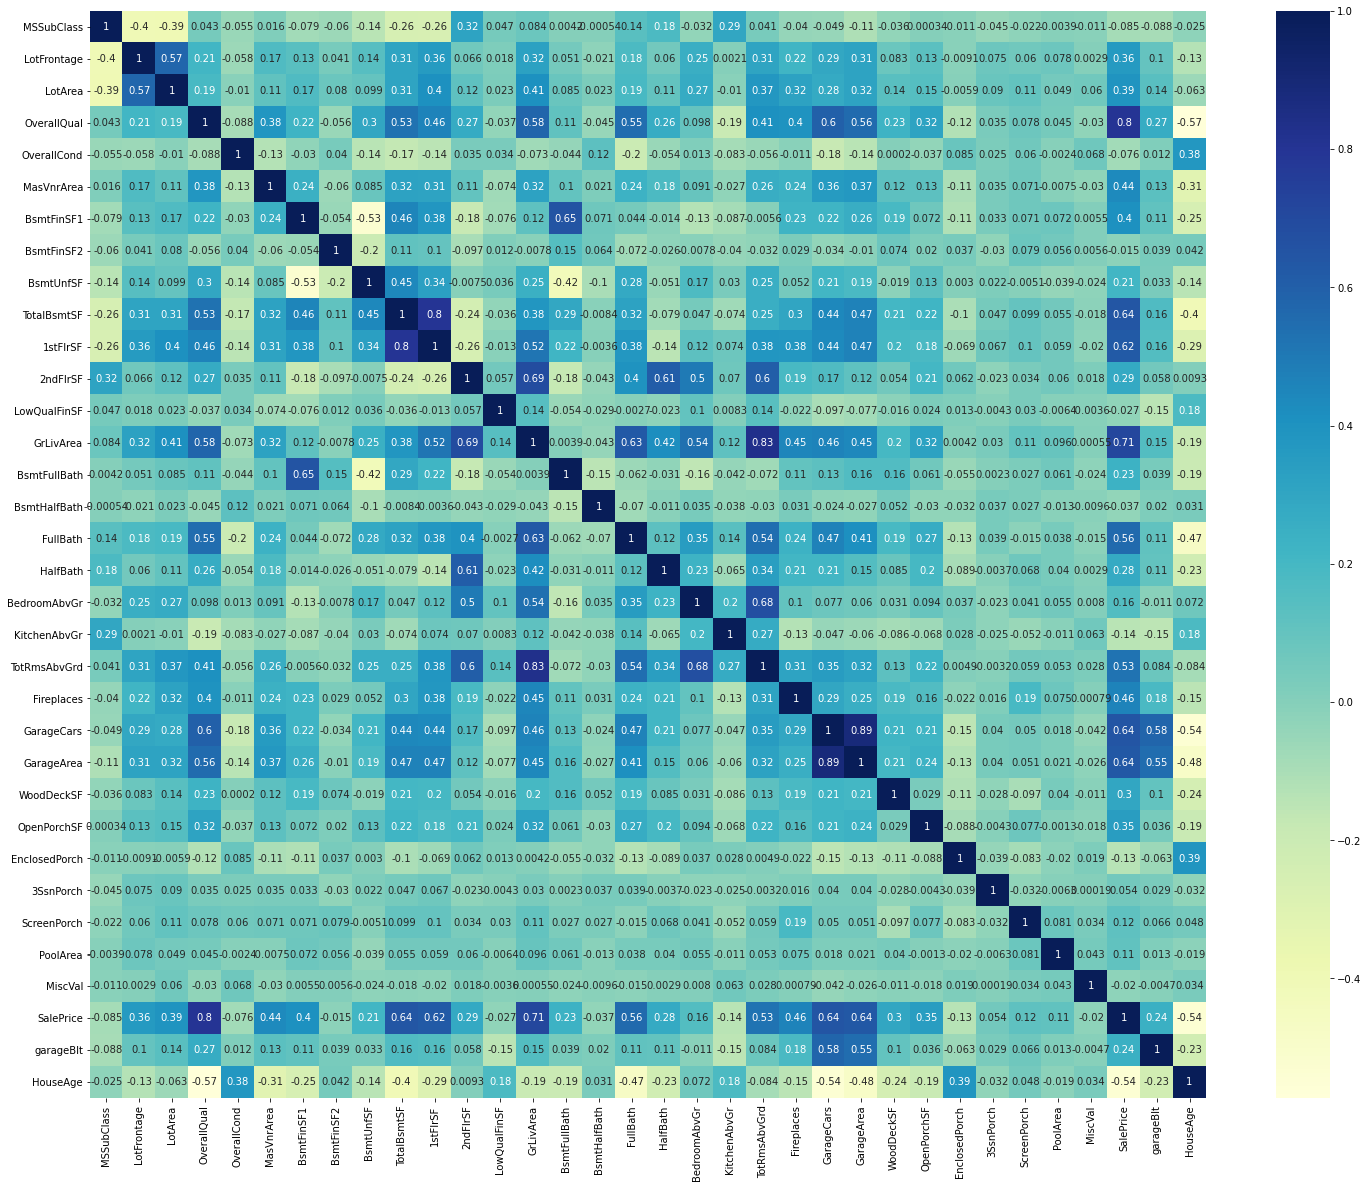

In [36]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%
- 1stFlrSF and TotalBsmtSF show 80%

In [37]:
# Removing the highly correlated variables
housing.drop(['TotRmsAbvGrd', 'GarageCars', '1stFlrSF'], axis = 1, inplace = True)
housing.shape

(1400, 71)

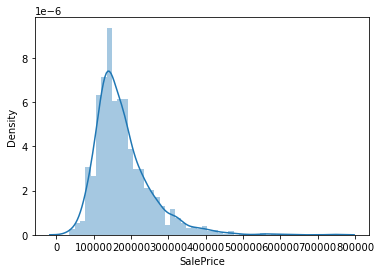

In [38]:
#Check if the target variable is normally distributed or not
sns.distplot(housing.SalePrice)
plt.show()

Observation: The SalePrice is skewed towards left, so let's apply log to make the distribution normal.

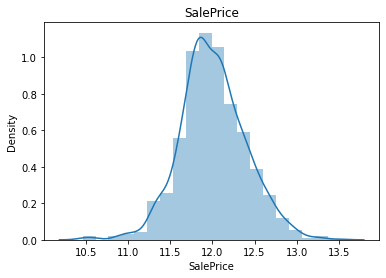

In [39]:
# Visualise the target variable -> SalePrice after transforming the sales price
housing['SalePrice'] = np.log1p(housing['SalePrice'])
plt.title('SalePrice')
sns.distplot(housing['SalePrice'], bins=20)
plt.show()

## Step 4: Data Preparation
Converting categorical data into numercal data
Creating Dummies

In [40]:
# Some fields are ordered list, assign values to them in order
housing['LotShape'] = housing['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
housing['ExterQual'] = housing['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
housing['BsmtQual'] = housing['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
housing['GarageFinish'] = housing['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
housing['BldgType'] = housing['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SaleType,SaleCondition,SalePrice,garageBlt,HouseAge
0,60,RL,65.0,8450,Pave,3,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,TA,PConc,4,TA,1,6,706,1,0,150,856,GasA,5,Y,SBrkr,854,0,1710,1,0,2,1,3,1,4,Typ,0,0,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,None,0,WD,Normal,12.247699,1,5
1,20,RL,80.0,9600,Pave,3,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,TA,CBlock,4,TA,4,5,978,1,0,284,1262,GasA,5,Y,SBrkr,0,0,1262,0,1,2,0,3,1,3,Typ,1,3,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,None,0,WD,Normal,12.109016,1,31
2,60,RL,68.0,11250,Pave,2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,TA,PConc,4,TA,2,6,486,1,0,434,920,GasA,5,Y,SBrkr,866,0,1786,1,0,2,1,3,1,4,Typ,1,3,Attchd,2,608,TA,TA,Y,0,42,0,0,0,0,None,0,WD,Normal,12.317171,1,7
3,70,RL,60.0,9550,Pave,2,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,TA,BrkTil,3,Gd,1,5,216,1,0,540,756,GasA,4,Y,SBrkr,756,0,1717,1,0,1,0,3,1,4,Typ,1,4,Detchd,1,642,TA,TA,Y,0,35,272,0,0,0,None,0,WD,Abnorml,11.849405,1,91
4,60,RL,84.0,14260,Pave,2,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,TA,PConc,4,TA,3,6,655,1,0,490,1145,GasA,5,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,4,Typ,1,3,Attchd,2,836,TA,TA,Y,192,84,0,0,0,0,None,0,WD,Normal,12.429220,1,8


In [41]:
# Selecting categorical variables for creating dummy variables
house_categorical = housing.select_dtypes(include=['object'])
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [42]:
# drop categorical variables for which dummies are created
housing = housing.drop(list(house_categorical.columns), axis=1)
# concat dummy variables with remaining variables
housing = pd.concat([housing, house_dummies], axis=1)
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,BldgType,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,garageBlt,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,1,7,5,196.0,4,4,1,6,706,1,0,150,856,5,854,0,1710,1,0,2,1,3,1,4,0,0,2,548,0,61,0,0,0,0,0,12.247699,1,5,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,1,6,8,0.0,3,4,4,5,978,1,0,284,1262,5,0,0,1262,0,1,2,0,3,1,3,1,3,2,460,298,0,0,0,0,0,0,12.109016,1,31,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

## Step 5: Train Test Split

In [43]:
# Putting all feature variable to X
X = housing.drop(['SalePrice'], axis=1)
# Putting response variable to y
y = housing['SalePrice']

X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,BldgType,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,garageBlt,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,1,7,5,196.0,4,4,1,6,706,1,0,150,856,5,854,0,1710,1,0,2,1,3,1,4,0,0,2,548,0,61,0,0,0,0,0,1,5,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,1,6,8,0.0,3,4,4,5,978,1,0,284,1262,5,0,0,1262,0,1,2,0,3,1,3,1,3,2,460,298,0,0,0,0,0,0,1,31,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

In [44]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'BldgType',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=207)

In [45]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## Step 6: Model Building and Evaluation

### Ridge Regression

In [46]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
#creating cv_results dataframe for model_cv.cv_results_
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015623,0.009880,0.006251,0.007656,0.0001,{'alpha': 0.0001},-0.086563,-0.079010,-0.096497,-0.088569,-0.085254,-0.087179,0.005649,26,-0.061294,-0.062495,-0.058397,-0.059233,-0.059164,-0.060117,0.001529
1,0.013939,0.008890,0.007921,0.004937,0.001,{'alpha': 0.001},-0.086566,-0.079007,-0.096496,-0.088566,-0.085249,-0.087177,0.005650,25,-0.061294,-0.062496,-0.058397,-0.059233,-0.059165,-0.060117,0.001529
2,0.009376,0.007655,0.009375,0.007655,0.01,{'alpha': 0.01},-0.086597,-0.078987,-0.096487,-0.088539,-0.085202,-0.087162,0.005654,24,-0.061300,-0.062502,-0.058395,-0.059233,-0.059174,-0.060121,0.001531
3,0.009376,0.007655,0.006250,0.007654,0.05,{'alpha': 0.05},-0.086724,-0.078897,-0.096446,-0.088423,-0.085006,-0.087099,0.005673,23,-0.061324,-0.062530,-0.058389,-0.059232,-0.059210,-0.060137,0.001541
4,0.009377,0.007656,0.006250,0.007655,0.1,{'alpha': 0.1},-0.086865,-0.078792,-0.096400,-0.088287,-0.084788,-0.087026,0.005697,22,-0.061351,-0.062562,-0.058381,-0.059234,-0.059253,-0.060156,0.001551


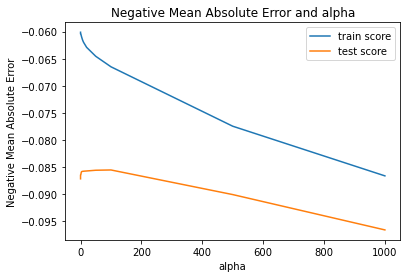

In [48]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [49]:
print("The best estimator across ALL searched params: ", model_cv.best_estimator_)

The best estimator across ALL searched params:  Ridge(alpha=100)


In [50]:
#Using the best hyper parameter in the ridge Regression
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-6.73043602e-03,  8.44987064e-03,  2.27446521e-02, -2.45826671e-03,
       -9.20341032e-03,  6.04328932e-02,  3.82408860e-02,  4.08054127e-03,
        8.60692188e-03,  1.34561085e-02,  1.26649719e-02,  1.19225025e-02,
        2.73859864e-02, -3.83584376e-03,  6.71085676e-03,  8.25702979e-03,
        4.00237154e-02,  1.21976623e-02,  1.24045349e-02,  2.42820852e-03,
        7.89439309e-02,  1.53771850e-02,  1.24935862e-03,  1.86849086e-02,
        1.56966404e-02,  1.11247864e-02, -8.93650499e-03,  1.95844474e-02,
        1.36832475e-02,  8.88798544e-03,  6.82638799e-03,  2.68068021e-02,
        9.96464682e-03,  1.78923865e-03,  2.62587132e-03,  1.18419691e-03,
        1.51949373e-02,  3.50146609e-03, -5.61116977e-04,  2.13720133e-03,
       -3.42532180e-02,  1.29407201e-02,  8.23510761e-03,  2.08296133e-02,
        1.19715027e-02,  2.55057969e-03, -3.63889808e-05, -1.08645183e-02,
       -4.97016336e-04, -4.90147335e-03,  5.69083646e-03, -5.53426237e-03,
       -3.08242798e-03, -

In [51]:
# predict and calculate r2_score for train and test data
y_train_pred = ridge.predict(X_train)
print('Ridge Reg r2_score for train data:', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('Ridge Reg r2_score for test data:', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('\nRMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Ridge Reg r2_score for train data: 0.9337403868472463
Ridge Reg r2_score for test data: 0.9211596109707338

RMSE : 0.11512462314745651


In [52]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
model_ridge_df = list(zip(cols, model_parameters))
model_ridge_df

[('constant', 12.007),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.008),
 ('LotArea', 0.023),
 ('LotShape', -0.002),
 ('BldgType', -0.009),
 ('OverallQual', 0.06),
 ('OverallCond', 0.038),
 ('MasVnrArea', 0.004),
 ('ExterQual', 0.009),
 ('BsmtQual', 0.013),
 ('BsmtExposure', 0.013),
 ('BsmtFinType1', 0.012),
 ('BsmtFinSF1', 0.027),
 ('BsmtFinType2', -0.004),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', 0.008),
 ('TotalBsmtSF', 0.04),
 ('HeatingQC', 0.012),
 ('2ndFlrSF', 0.012),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.079),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.019),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.011),
 ('KitchenAbvGr', -0.009),
 ('KitchenQual', 0.02),
 ('Fireplaces', 0.014),
 ('FireplaceQu', 0.009),
 ('GarageFinish', 0.007),
 ('GarageArea', 0.027),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.002),
 ('EnclosedPorch', 0.003),
 ('3SsnPorch', 0.001),
 ('ScreenPorch', 0.015),
 ('PoolArea', 0.004),
 ('MiscVal', -0.001),
 ('garageBlt', 0.002),
 ('HouseAge'

In [53]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Top 10 
ridge_df.head(10) 

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,GrLivArea,0.0789,0.0789
1,OverallQual,0.0604,0.0604
2,TotalBsmtSF,0.0400,0.0400
3,OverallCond,0.0382,0.0382
4,HouseAge,-0.0343,0.0343
5,SaleCondition_Normal,0.0308,0.0308
6,BsmtFinSF1,0.0274,0.0274
7,GarageArea,0.0268,0.0268
8,LotArea,0.0227,0.0227
9,MSZoning_RL,0.0208,0.0208


### Lasso Regression

In [54]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.181925,0.035693,0.003125,0.006250,0.0001,{'alpha': 0.0001},-0.087921,-0.077372,-0.095228,-0.086607,-0.082072,-0.085840,0.005983,3,-0.061922,-0.063273,-0.058711,-0.059533,-0.060094,-0.060707,0.001661
1,0.173718,0.064906,0.003125,0.006250,0.001,{'alpha': 0.001},-0.087149,-0.071681,-0.093276,-0.080899,-0.078002,-0.082201,0.007445,1,-0.064497,-0.066594,-0.061108,-0.063093,-0.063553,-0.063769,0.001794
2,0.015626,0.000002,0.000000,0.000000,0.01,{'alpha': 0.01},-0.089606,-0.073919,-0.096434,-0.083919,-0.076243,-0.084024,0.008341,2,-0.078940,-0.080760,-0.075457,-0.078342,-0.078133,-0.078326,0.001707
3,0.015626,0.000002,0.006249,0.007653,0.05,{'alpha': 0.05},-0.121017,-0.104091,-0.129284,-0.119103,-0.096449,-0.113989,0.011959,4,-0.111420,-0.114610,-0.109453,-0.111985,-0.113024,-0.112099,0.001711
4,0.006254,0.007660,0.009376,0.007655,0.1,{'alpha': 0.1},-0.156448,-0.146258,-0.177246,-0.157175,-0.128408,-0.153107,0.015921,5,-0.151082,-0.154940,-0.150846,-0.151949,-0.152549,-0.152273,0.001466


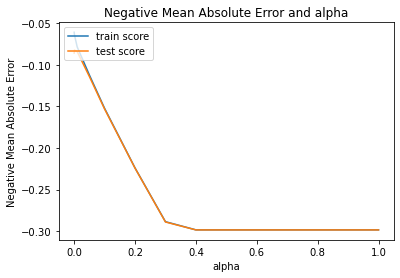

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
print("The best estimator across ALL searched params:", model_cv.best_estimator_)

The best estimator across ALL searched params: Lasso(alpha=0.001)


In [58]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-1.10669951e-03,  6.30808020e-03,  2.25678920e-02, -1.79983705e-03,
       -1.35712596e-02,  7.33431724e-02,  4.55761398e-02,  2.68257038e-04,
        1.24414138e-03,  5.82132176e-03,  1.08248529e-02,  8.75290331e-03,
        2.34729586e-02, -1.12777751e-03,  1.44904351e-03, -0.00000000e+00,
        3.56460631e-02,  1.04493882e-02, -7.39625699e-03, -0.00000000e+00,
        1.38878065e-01,  1.42332507e-02,  8.82436178e-04,  2.73695020e-03,
        6.83430733e-03,  0.00000000e+00, -1.13687400e-02,  1.39760374e-02,
        1.07231273e-02,  3.27782319e-03,  5.33862845e-03,  2.32727463e-02,
        8.34453413e-03,  0.00000000e+00,  4.59877155e-03, -0.00000000e+00,
        1.49785827e-02, -0.00000000e+00,  0.00000000e+00,  1.63804748e-03,
       -6.69962053e-02,  4.03328812e-02,  2.01522086e-02,  7.37703872e-02,
        5.49645905e-02,  0.00000000e+00, -0.00000000e+00, -8.55793548e-03,
        0.00000000e+00, -3.02860923e-03,  3.47806069e-03, -2.08261045e-03,
       -1.28338721e-03, -

In [59]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.007),
 ('MSSubClass', -0.001),
 ('LotFrontage', 0.006),
 ('LotArea', 0.023),
 ('LotShape', -0.002),
 ('BldgType', -0.014),
 ('OverallQual', 0.073),
 ('OverallCond', 0.046),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.001),
 ('BsmtQual', 0.006),
 ('BsmtExposure', 0.011),
 ('BsmtFinType1', 0.009),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinType2', -0.001),
 ('BsmtFinSF2', 0.001),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.036),
 ('HeatingQC', 0.01),
 ('2ndFlrSF', -0.007),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.139),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.003),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.011),
 ('KitchenQual', 0.014),
 ('Fireplaces', 0.011),
 ('FireplaceQu', 0.003),
 ('GarageFinish', 0.005),
 ('GarageArea', 0.023),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.005),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.015),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('garageBlt', 0.002),
 ('HouseAge', -0.067)

In [60]:
# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)

print('Lasso Reg r2_score for train data:', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print('Lasso Reg r2_score for test data:', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('\nRMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Lasso Reg r2_score for train data: 0.938625005282869
Lasso Reg r2_score for test data: 0.9234354892050745

RMSE : 0.11345080929836424


In [61]:
##Creating a dataframe of features and coefficients
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

 #Top10 features display
lasso_df.head(10) 

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,GrLivArea,0.1389,0.1389
1,MSZoning_RL,0.0738,0.0738
2,OverallQual,0.0733,0.0733
3,HouseAge,-0.0670,0.0670
4,MSZoning_RM,0.0550,0.0550
5,OverallCond,0.0456,0.0456
6,MSZoning_FV,0.0403,0.0403
7,TotalBsmtSF,0.0356,0.0356
8,SaleCondition_Normal,0.0327,0.0327
9,SaleType_New,0.0259,0.0259


## Assignment Questions(Part-2)

Note: Please find all the answers in PDF

Question-1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

##### Doubling the hyper parameter value for Ridge

Ridge with alpha 100*2=200

In [62]:
alpha_double = 200
ridge = Ridge(alpha=alpha_double)

ridge.fit(X_train, y_train)

Ridge(alpha=200)

In [63]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_double_df = list(zip(cols, model_parameters))
ridge_double_df

[('constant', 12.007),
 ('MSSubClass', -0.006),
 ('LotFrontage', 0.01),
 ('LotArea', 0.022),
 ('LotShape', -0.003),
 ('BldgType', -0.008),
 ('OverallQual', 0.054),
 ('OverallCond', 0.033),
 ('MasVnrArea', 0.006),
 ('ExterQual', 0.013),
 ('BsmtQual', 0.014),
 ('BsmtExposure', 0.013),
 ('BsmtFinType1', 0.013),
 ('BsmtFinSF1', 0.026),
 ('BsmtFinType2', -0.002),
 ('BsmtFinSF2', 0.006),
 ('BsmtUnfSF', 0.008),
 ('TotalBsmtSF', 0.038),
 ('HeatingQC', 0.013),
 ('2ndFlrSF', 0.014),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.065),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.015),
 ('BedroomAbvGr', 0.013),
 ('KitchenAbvGr', -0.007),
 ('KitchenQual', 0.021),
 ('Fireplaces', 0.014),
 ('FireplaceQu', 0.012),
 ('GarageFinish', 0.008),
 ('GarageArea', 0.027),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.003),
 ('EnclosedPorch', 0.002),
 ('3SsnPorch', 0.002),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.002),
 ('MiscVal', -0.001),
 ('garageBlt', 0.002),
 ('HouseAge'

In [64]:
# predict
y_train_pred = ridge.predict(X_train)
print('Ridge Reg r2_score for train data:', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('Ridge Reg r2_score for test data:', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print('\nRMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Ridge Reg r2_score for train data: 0.9284220779749317
Ridge Reg r2_score for test data: 0.9195075399474633

RMSE : 0.1163245664717595


In [65]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)  #Top10

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,GrLivArea,0.0646,0.0646
1,OverallQual,0.0543,0.0543
2,TotalBsmtSF,0.0378,0.0378
3,OverallCond,0.0330,0.0330
4,GarageArea,0.0267,0.0267
5,BsmtFinSF1,0.0258,0.0258
6,HouseAge,-0.0258,0.0258
7,SaleCondition_Normal,0.0245,0.0245
8,LotArea,0.0220,0.0220
9,FullBath,0.0216,0.0216


#### Double the Alpha for Lasso

Lasso with alpha=0.001*2=0.002

In [66]:
alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.006),
 ('MSSubClass', -0.001),
 ('LotFrontage', 0.007),
 ('LotArea', 0.022),
 ('LotShape', -0.002),
 ('BldgType', -0.01),
 ('OverallQual', 0.08),
 ('OverallCond', 0.045),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.004),
 ('BsmtQual', 0.002),
 ('BsmtExposure', 0.011),
 ('BsmtFinType1', 0.008),
 ('BsmtFinSF1', 0.025),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.04),
 ('HeatingQC', 0.01),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.132),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.003),
 ('HalfBath', 0.004),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.011),
 ('KitchenQual', 0.013),
 ('Fireplaces', 0.009),
 ('FireplaceQu', 0.006),
 ('GarageFinish', 0.005),
 ('GarageArea', 0.025),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.004),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('garageBlt', 0.001),
 ('HouseAge', -0.067),
 ('MSZon

In [67]:
lasso_list=list(zip(cols,model_parameters))
lasso_df=pd.DataFrame(lasso_list)
lasso_df.columns=['Feature','Coefficent']
lasso_df.head()
lasso_df[(lasso_df['Coefficent']!=0)].sort_values((['Coefficent']), axis = 0, ascending = False)

,Feature,Coefficent
0,constant,12.006
21,GrLivArea,0.132
6,OverallQual,0.080
7,OverallCond,0.045
17,TotalBsmtSF,0.040
200,SaleType_New,0.029
206,SaleCondition_Normal,0.027
32,GarageArea,0.025
13,BsmtFinSF1,0.025
3,LotArea,0.022


In [68]:
# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print('Lasso Reg r2_score for train data:', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print('Lasso Reg r2_score for test data:', metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('\nRMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Lasso Reg r2_score for train data: 0.9323464630311609
Lasso Reg r2_score for test data: 0.9219088018253238

RMSE : 0.11457632425909463


In [69]:
##Creating a dataframe of features and coefficients
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

 #Top10 features display
lasso_df.head(10) 

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,GrLivArea,0.1317,0.1317
1,OverallQual,0.0796,0.0796
2,HouseAge,-0.0670,0.0670
3,OverallCond,0.0450,0.0450
4,TotalBsmtSF,0.0397,0.0397
5,SaleType_New,0.0291,0.0291
6,SaleCondition_Normal,0.0273,0.0273
7,GarageArea,0.0249,0.0249
8,BsmtFinSF1,0.0246,0.0246
9,LotArea,0.0220,0.0220


Question-3: 
After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now? 

In [70]:
#Drop top 5 features from Original Lasso Regression Model and build Lasso regression
#Top5 features are 
housing_df = housing.drop(['GrLivArea', 'MSZoning_RL', 'OverallQual','HouseAge','MSZoning_RM'],axis=1)

In [71]:
# Putting all feature variable to X
X = housing_df.drop(['SalePrice'], axis=1)
# Putting response variable to y
y = housing_df['SalePrice']

X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,BldgType,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,garageBlt,MSZoning_FV,MSZoning_RH,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,1,5,196.0,4,4,1,6,706,1,0,150,856,5,854,0,1,0,2,1,3,1,4,0,0,2,548,0,61,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,1,8,0.0,3,4,4,5,978,1,0,284,1262,5,0,0,0,1,2,0,3,1,3,1,3,2,460,298,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,

In [72]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'BldgType',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=202)

In [73]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [74]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.207687,0.048305,0.003125,0.006251,0.0001,{'alpha': 0.0001},-0.106191,-0.096074,-0.111011,-0.100471,-0.103449,-0.103439,0.005059,3,-0.073225,-0.076244,-0.071402,-0.072225,-0.072665,-0.073152,0.001657
1,0.162868,0.029843,0.003125,0.006250,0.001,{'alpha': 0.001},-0.101534,-0.089089,-0.108412,-0.095147,-0.098093,-0.098455,0.006441,1,-0.075242,-0.079560,-0.073502,-0.075191,-0.075040,-0.075707,0.002032
2,0.018750,0.006258,0.000000,0.000000,0.01,{'alpha': 0.01},-0.104172,-0.083377,-0.120984,-0.103670,-0.097779,-0.101997,0.012104,2,-0.094377,-0.096299,-0.090639,-0.091596,-0.091560,-0.092894,0.002114
3,0.012497,0.006249,0.003125,0.006250,0.05,{'alpha': 0.05},-0.138959,-0.112284,-0.154588,-0.134154,-0.120416,-0.132080,0.014739,4,-0.129064,-0.132113,-0.126913,-0.128383,-0.129714,-0.129237,0.001712
4,0.009376,0.007655,0.009378,0.007657,0.1,{'alpha': 0.1},-0.177236,-0.157898,-0.199790,-0.178631,-0.161601,-0.175031,0.014864,5,-0.172700,-0.176578,-0.169802,-0.171226,-0.173507,-0.172762,0.002291


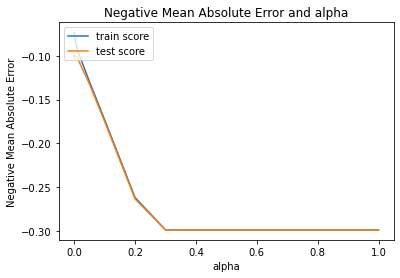

In [76]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [77]:
print("The best estimator across ALL searched params:", model_cv.best_estimator_)

The best estimator across ALL searched params: Lasso(alpha=0.001)


In [78]:
# Building lasso model after removing the top 5 features
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_list_2=list(zip(cols,model_parameters))
lasso_df_2=pd.DataFrame(lasso_list_2)
lasso_df_2.columns=['Feature','Coefficent']
lasso_df_2.head()
lasso_df_2[(lasso_df_2['Coefficent']!=0)].sort_values((['Coefficent']), axis = 0, ascending = False)

,Feature,Coefficent
0,constant,12.007
16,TotalBsmtSF,0.118
18,2ndFlrSF,0.080
149,BsmtCond_None,0.053
6,OverallCond,0.047
30,GarageArea,0.042
201,SaleCondition_Normal,0.039
144,Foundation_PConc,0.032
26,KitchenQual,0.031
22,FullBath,0.031


In [79]:
##Creating a dataframe of features and coefficients
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

 #Top10 features display
lasso_df.head(10) 

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,TotalBsmtSF,0.1176,0.1176
1,2ndFlrSF,0.0805,0.0805
2,BsmtCond_None,0.0526,0.0526
3,OverallCond,0.0466,0.0466
4,GarageArea,0.0419,0.0419
5,SaleCondition_Normal,0.0387,0.0387
6,Foundation_PConc,0.0322,0.0322
7,KitchenQual,0.0311,0.0311
8,FullBath,0.0307,0.0307
9,BsmtQual,0.0287,0.0287


The five most important predictor variables noware: ['TotalBsmtSF', '2ndFlrSF', 'BsmtCond_None', 'OverallCond', 'GarageArea']